In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import numpy as np
df=pd.read_csv("athlete_events.csv")
regions_df=pd.read_csv("noc_regions.csv")

In [ ]:
# Overall analysis:
# Number of editions, cities, events/sports, atheletes and participating nations

In [49]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal  
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN

In [33]:
df['Year'].unique().shape[0] - 1

34

In [35]:
df['City'].unique().shape[0]

42

In [37]:
df['Sport'].unique().shape[0]

66

In [39]:
df['Event'].unique().shape[0]

765

In [41]:
df['Name'].unique().shape[0]

134732

In [51]:
df['Team'].unique().shape[0]

1184

In [11]:
df.drop_duplicates(['Year', 'Team'])['Year'].value_counts().reset_index().rename(columns={'Year': 'index'}).sort_values('index')

index  count
34   1896     18
10   1900    190
29   1904     79
33   1906     52
30   1908     73
25   1912    102
32   1920     72
27   1924     93
28   1928     85
31   1932     72
16   1936    132
17   1948    131
13   1952    155
14   1956    149
9    1960    196
8    1964    199
15   1968    145
12   1972    157
18   1976    126
23   1980    111
11   1984    179
7    1988    211
6    1992    239
26   1994    101
3    1996    246
24   1998    106
5    2000    243
21   2002    114
1    2004    260
22   2006    113
0    2008    292
20   2010    116
4    2012    245
19   2014    119
2    2016    249

In [63]:
nations_over_time = df.drop_duplicates(['Year', 'Team'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition','count':'No. of countries'}) 

Edition  No. of countries
34     1896                18
10     1900               190
29     1904                79
33     1906                52
30     1908                73
25     1912               102
32     1920                72
27     1924                93
28     1928                85
31     1932                72
16     1936               132
17     1948               131
13     1952               155
14     1956               149
9      1960               196
8      1964               199
15     1968               145
12     1972               157
18     1976               126
23     1980               111
11     1984               179
7      1988               211
6      1992               239
26     1994               101
3      1996               246
24     1998               106
5      2000               243
21     2002               114
1      2004               260
22     2006               113
0      2008               292
20     2010               116
4      2012               245
19     2014               119
2      2016               249

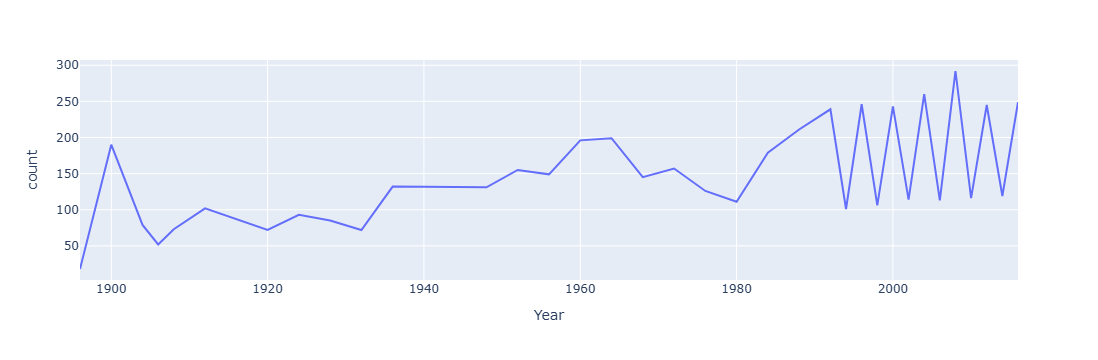

In [65]:
import plotly.express as px
fig = px.line(nations_over_time, x="Year", y="count")
fig.show()

In [ ]:
#Same for athelete_over_year and events_over_time

<Axes: xlabel='Year', ylabel='Sport'>

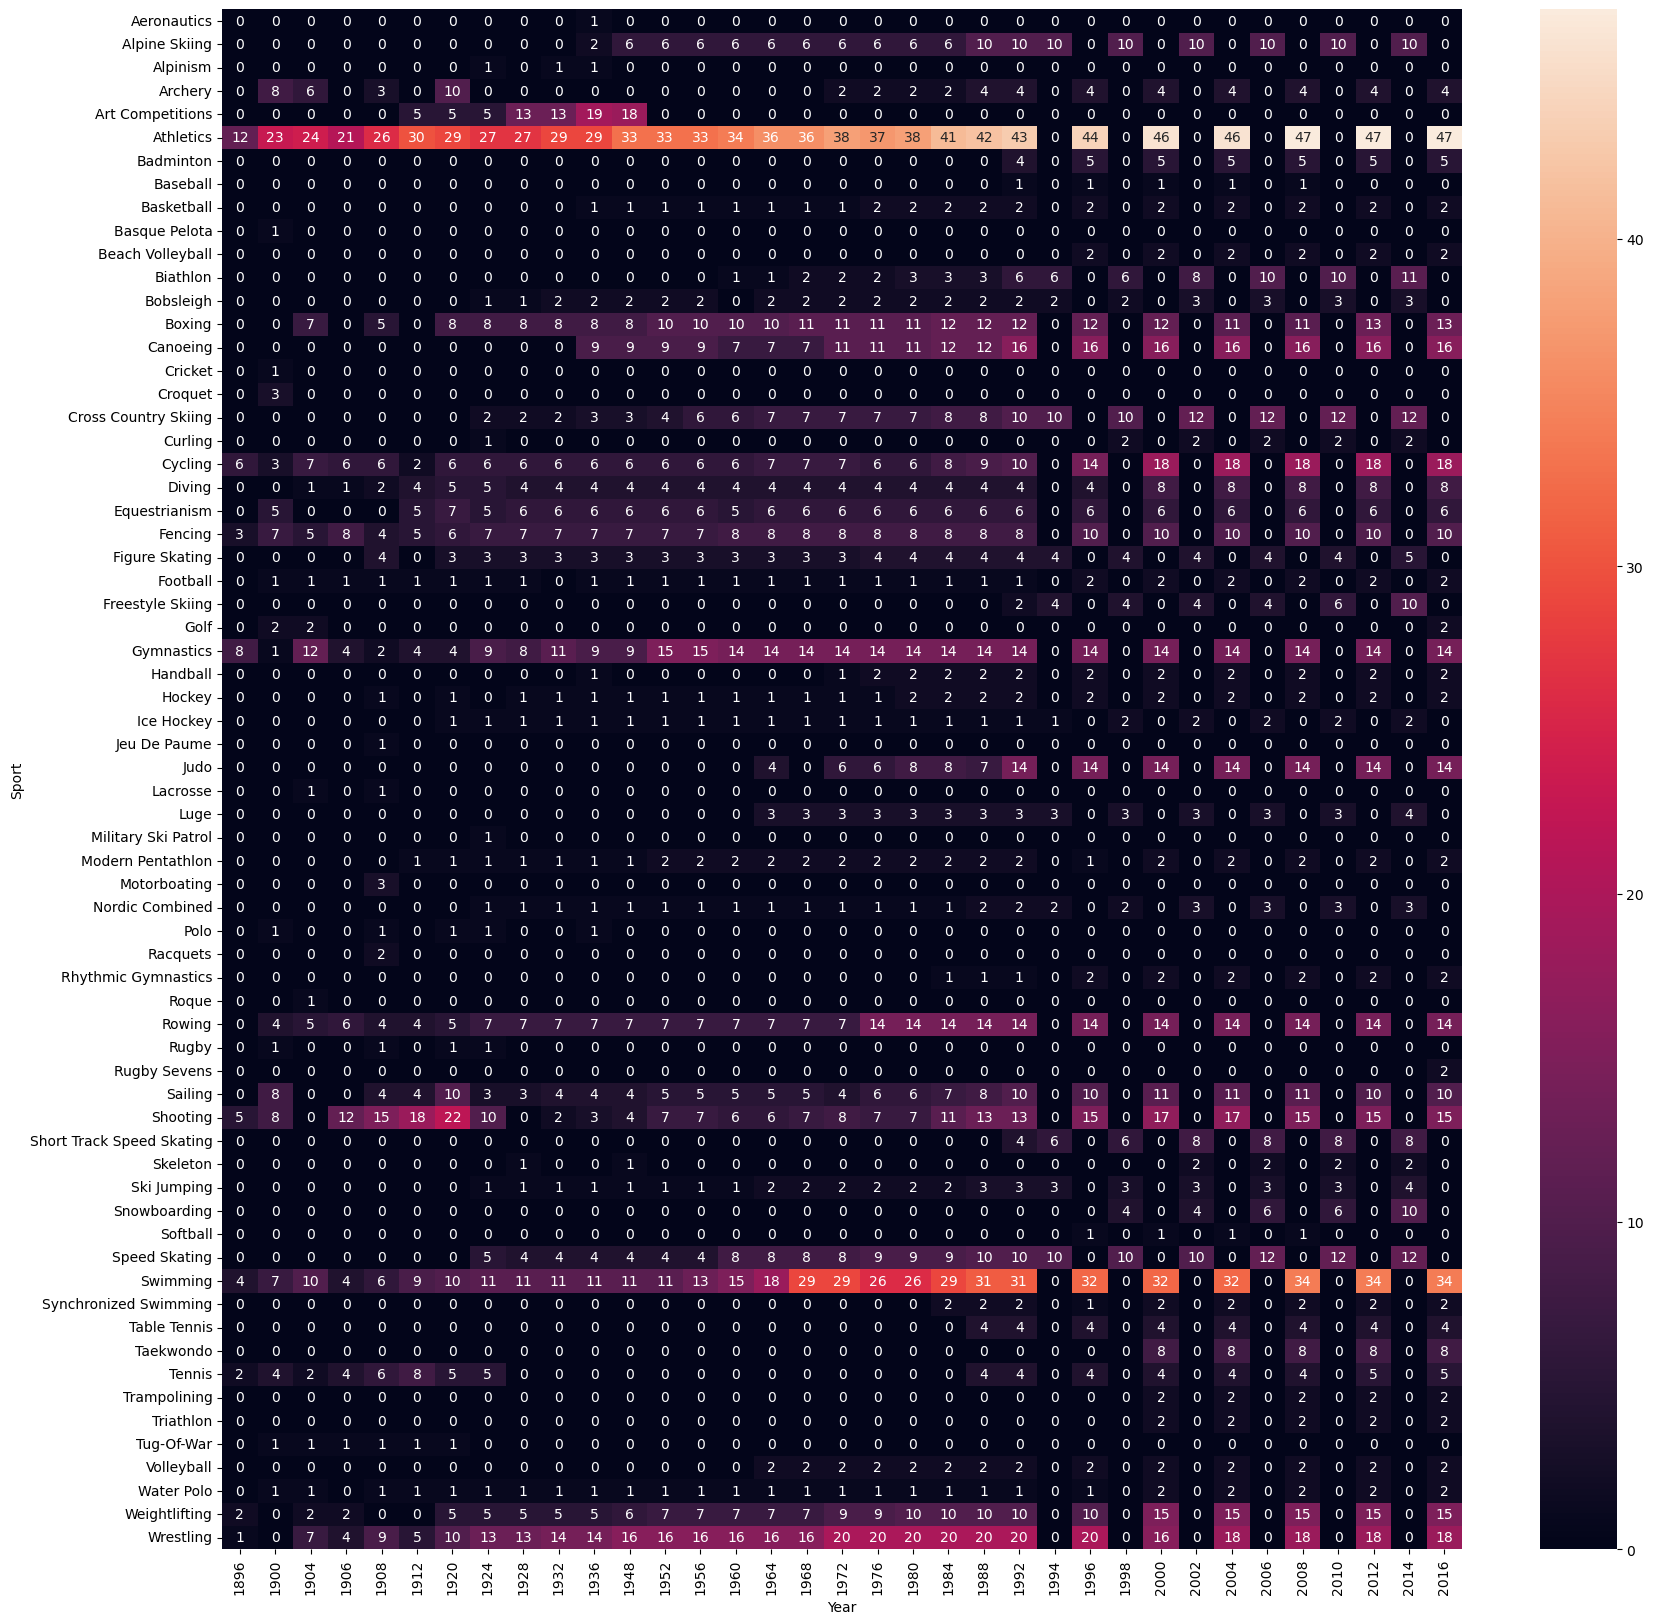

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
x=df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [37]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    counts_df = temp_df['Name'].value_counts().reset_index()
    counts_df.columns = ['index', 'Name_x']
    
    x = counts_df.head(15).merge(
        df, left_on='index', right_on='Name', how='left'
    )[['index', 'Name_x', 'Sport', 'Team']].drop_duplicates('index')
    
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [39]:
most_successful(df,'Basketball')

Name  Medals       Sport           Team
0                    Teresa Edwards       5  Basketball  United States
5               Kristi Lee Harrower       4  Basketball      Australia
9          Tamika Devonne Catchings       4  Basketball  United States
13      Gennady Georgiyevich Volnov       4  Basketball   Soviet Union
17        Suzanne Brigit "Sue" Bird       4  Basketball  United States
21         Lauren Elizabeth Jackson       4  Basketball      Australia
25      Sergey Aleksandrovich Belov       4  Basketball   Soviet Union
29             Carmelo Kyan Anthony       4  Basketball  United States
33             Diana Lurena Taurasi       4  Basketball  United States
37  Lisa Deshawn Leslie (-Lockwood)       4  Basketball  United States
41      Jos Manuel Caldern Borrallo       3  Basketball          Spain
45          Sylvia Shaqueria Fowles       3  Basketball  United States
48         Seimone Delicia Augustus       3  Basketball  United States
51            Andrija "Andro" Knego       3  Basketball     Yugoslavia
54                  Valdis Muinieks       3  Basketball   Soviet Union

In [ ]:
# Countrywise analysis:
# 1.Countrywise medal tally per year(Line plot)
# 2.What countries are good at heatmap
# 3.Most successfull Atheletes(top 10)

In [51]:
athlete_df = df.dropna(subset=['Medal'])
athlete_df.drop_duplicates(subset=['NOC', 'Team','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8224\312625070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_df.drop_duplicates(subset=['NOC', 'Team','Games','Year','City','Sport','Event','Medal'],inplace=True)


In [73]:
new_df=athlete_df[athlete_df['Team']=='United States']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

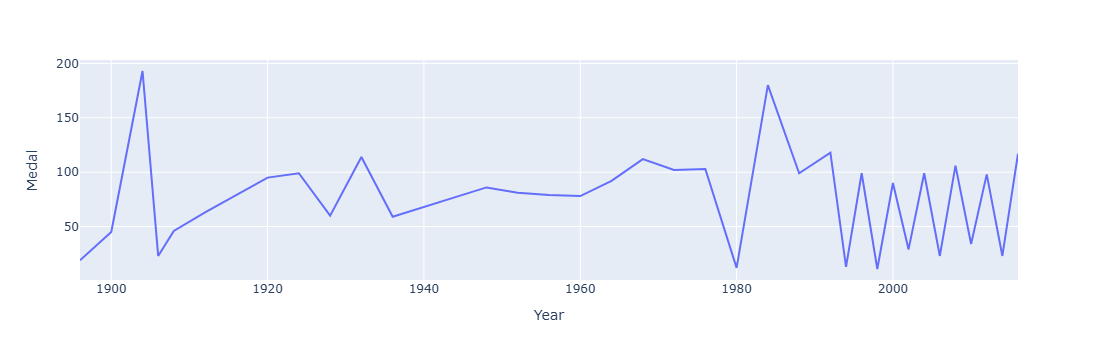

In [75]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

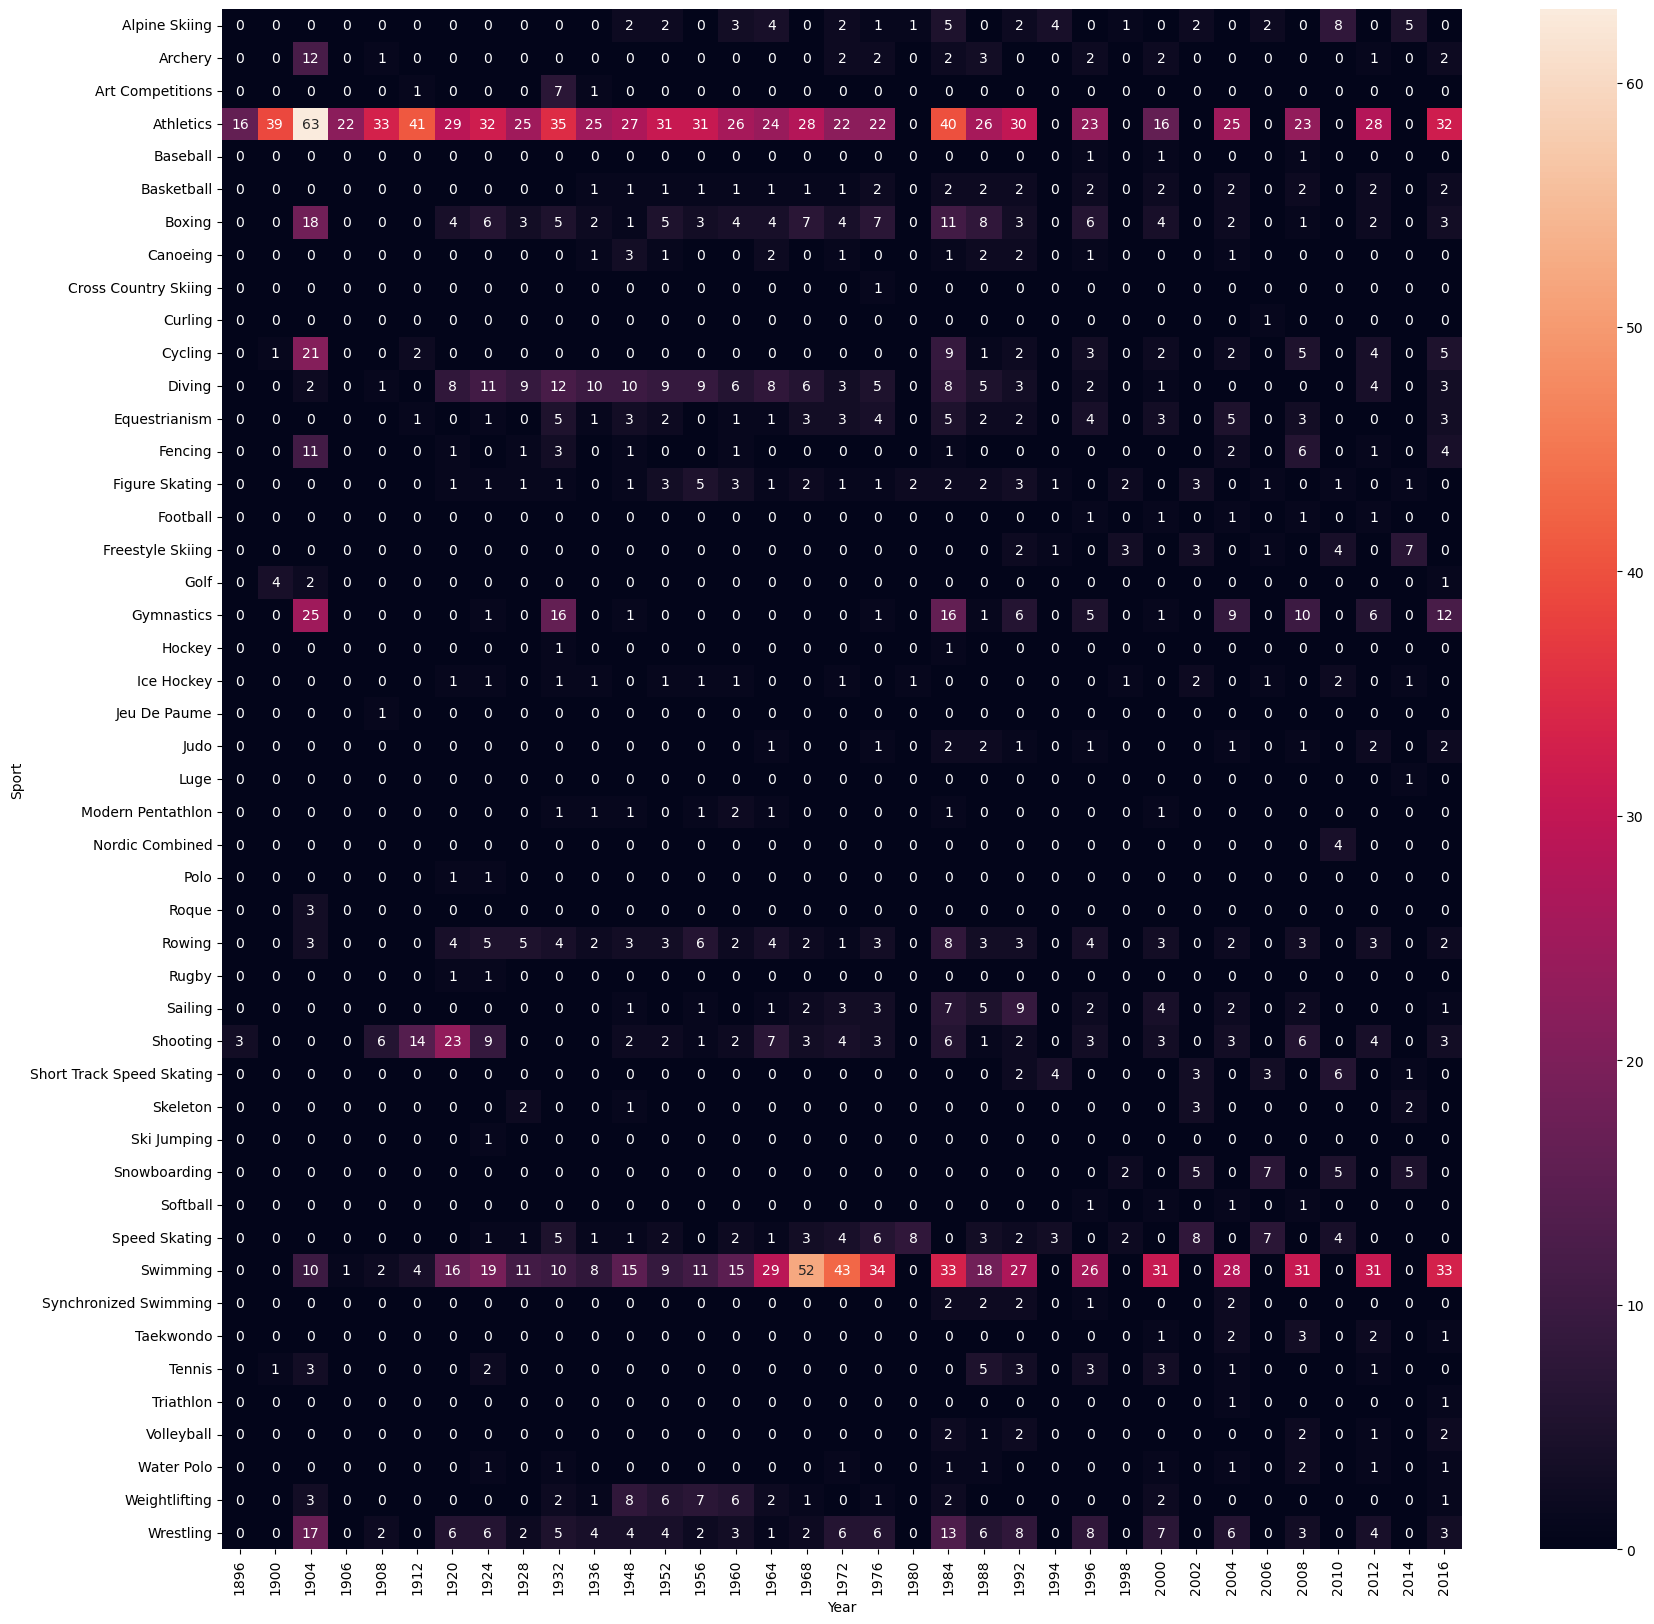

In [91]:
new_df=athlete_df[athlete_df['Team']=='United States']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [105]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['Team'] == country]

    counts_df = temp_df['Name'].value_counts().reset_index()
    counts_df.columns = ['Name', 'Medals'] 
    
    x = counts_df.head(15).merge(df, on='Name', how='left')[['Name', 'Medals', 'Sport']].drop_duplicates('Name')
    
    return x

In [107]:
most_successful(df,'India')

Name  Medals   Sport
0                    Udham Singh Kular       4  Hockey
4               Leslie Walter Claudius       4  Hockey
8                  Ranganathan Francis       3  Hockey
11           Balbir Singh Dosanjh, Sr.       3  Hockey
14              Harbinder Singh Chimni       3  Hockey
17           Victor John "V. J." Peter       3  Hockey
20                Randhir Singh Gentle       3  Hockey
23                    Dhyan Chand Bais       3  Hockey
26                        Balbir Singh       3  Hockey
29               Shankar Pillay Laxman       3  Hockey
32                 Richard James Allen       3  Hockey
35                     Prithipal Singh       3  Hockey
38              Joginder "Gindi" Singh       2  Hockey
40                        Gurbux Singh       2  Hockey
42  Grahanandan Nandy "G. Nandy" Singh       2  Hockey